# Acquiring genes associated with inflammation 

To start off, we would like to obtain genes that are associated with inflammation. For this purpose we will acquire these genes from two databases, and later on match them so that we are more confident of the association of the genes with inflammation.
The two databases we will use are DisGeNET and GeneCards. Both can be found at [DisGeNET](http://www.disgenet.org/) and [GeneCards](https://www.genecards.org/). 

The genesets have to be downloaded manually. For DisGeNET the following link has to be used: [DisGeNET inflammation genes](http://www.disgenet.org/browser/0/1/0/C0021368/),
for GeneCards: [GeneCards](https://www.genecards.org/Search/Keyword?queryString=inflammation)
The search query used for both databases is "Inflammation".

The following step only works in RStudio. If working in another environment, please set the working directory properly and check if the working directory is correct!

In [3]:
# set wd to where script file is saved
setwd(dirname(rstudioapi::callFun("getActiveDocumentContext")$path))

ERROR: Error: RStudio not running


In [1]:
# check wd
getwd()

[1] "C:/Users/Laurent/Untitled Folder"

In [2]:
# load libraries
library(dplyr)
library(tidyr)


Attaching package: 'dplyr'

The following objects are masked from 'package:stats':

    filter, lag

The following objects are masked from 'package:base':

    intersect, setdiff, setequal, union

Warning message:
"package 'tidyr' was built under R version 3.5.2"

Now we have set the working directory to the right place and installed the necessary packages, it is time to import our files with genes associated with inflammation that we downloaded from DisGeNET and GeneCards.

In [3]:
# load in files
disgenet <- read.table(file.path(getwd(), "InflGenes", "disgenet.txt"), header = T, sep = "\t", stringsAsFactors = FALSE)
genecards <- read.table(file.path(getwd(), "InflGenes", "genecards.txt"), header = T, sep = "\t", stringsAsFactors = FALSE)

# check head of both files
head(disgenet)
dim(disgenet)
head(genecards)
dim(genecards)

Warning message in scan(file = file, what = what, sep = sep, quote = quote, dec = dec, :
"EOF within quoted string"Warning message in scan(file = file, what = what, sep = sep, quote = quote, dec = dec, :
"number of items read is not a multiple of the number of columns"

diseaseid,disease_name,geneid,symbol,uniprot,protein_class,gene_name,dsi,dpi,pli,score,el,ei,npmids,nsnps,year_initial,year_final
C0021368,Inflammation,3576,CXCL8,P10145,signaling molecule,C-X-C motif chemokine ligand 8,0.342,0.862,NA,0.40,no reported evidence,NA,13,0,2003,2015
C0021368,Inflammation,1401,CRP,P02741,,C-reactive protein,0.399,0.862,0.0037357,0.40,no reported evidence,NA,18,0,2001,2011
C0021368,Inflammation,7124,TNF,P01375,signaling molecule,tumor necrosis factor,0.263,0.966,0.8046000,0.40,no reported evidence,NA,26,0,2001,2014
C0021368,Inflammation,7040,TGFB1,P01137,signaling molecule,transforming growth factor beta 1,0.336,0.931,0.1718200,0.38,no reported evidence,NA,10,0,2002,2010
C0021368,Inflammation,3569,IL6,P05231,,interleukin 6,0.287,0.966,0.3387300,0.37,no reported evidence,NA,18,0,2001,2016
C0021368,Inflammation,3553,IL1B,P01584,,interleukin 1 beta,0.312,0.931,0.1256800,0.37,no reported evidence,NA,16,0,1999,2017


[1] 428  17

Gene.Symbol,Description,Category,Gifts,GC.Id,Relevance.score,GeneCards.Link
TNF,Tumor Necrosis Factor,Protein Coding,60,GC06P032174,79.95,https://www.genecards.org/cgi-bin/carddisp.pl?gene=TNF
IL6,Interleukin 6,Protein Coding,55,GC07P022765,79.59,https://www.genecards.org/cgi-bin/carddisp.pl?gene=IL6
IL10,Interleukin 10,Protein Coding,54,GC01M206767,64.81,https://www.genecards.org/cgi-bin/carddisp.pl?gene=IL10
CRP,C-Reactive Protein,Protein Coding,53,GC01M159682,50.27,https://www.genecards.org/cgi-bin/carddisp.pl?gene=CRP
TLR4,Toll Like Receptor 4,Protein Coding,59,GC09P117704,45.72,https://www.genecards.org/cgi-bin/carddisp.pl?gene=TLR4
NOD2,Nucleotide Binding Oligomerization Domain Containing 2,Protein Coding,54,GC16P050693,44.97,https://www.genecards.org/cgi-bin/carddisp.pl?gene=NOD2


[1] 5531    7

Now that we have our genesets from both databases, we would like to merge them so that we are more confident about the association between the genes and inflammation. But first, we will clean up the files so they are easier to work with and contain necessary information.

In [4]:
# clean up DisGeNET file
disgenet <- disgenet %>% select(geneid, symbol, score)
colnames(disgenet)[c(1,2,3)] <- c("entrezgene", "hgnc_symbol", "dis_score")

In [5]:
# clean up GeneCards file
genecards <- genecards %>% select(Gene.Symbol, Relevance.score)
colnames(genecards)[c(1,2)] <- c("hgnc_symbol", "GC_score")

In [6]:
# check the files and their dimensions
head(disgenet)
dim(disgenet)
head(genecards)
dim(genecards)

entrezgene,hgnc_symbol,dis_score
3576,CXCL8,0.40
1401,CRP,0.40
7124,TNF,0.40
7040,TGFB1,0.38
3569,IL6,0.37
3553,IL1B,0.37


[1] 428   3

hgnc_symbol,GC_score
TNF,79.95
IL6,79.59
IL10,64.81
CRP,50.27
TLR4,45.72
NOD2,44.97


[1] 5531    2

Because the DisGeNET file contains entrezgene IDs, we don't have to map identifiers as we are going to use the entrezgene IDs together with the hgnc symbols from now on. 
The next step is to merge bothe genesets, this can be done based on the hgnc symbols both files contain.

In [7]:
# merge files based on hgnc_symbol
merged_infl_genes <- disgenet %>% left_join(genecards, by = "hgnc_symbol")
head(merged_infl_genes)
dim(merged_infl_genes)

entrezgene,hgnc_symbol,dis_score,GC_score
3576,CXCL8,0.40,43.88
1401,CRP,0.40,50.27
7124,TNF,0.40,79.95
7040,TGFB1,0.38,28.66
3569,IL6,0.37,79.59
3553,IL1B,0.37,40.29


[1] 428   4

Before we set a cutoff value for our merged genesets, we would like to see the score-distribution of both databases. 

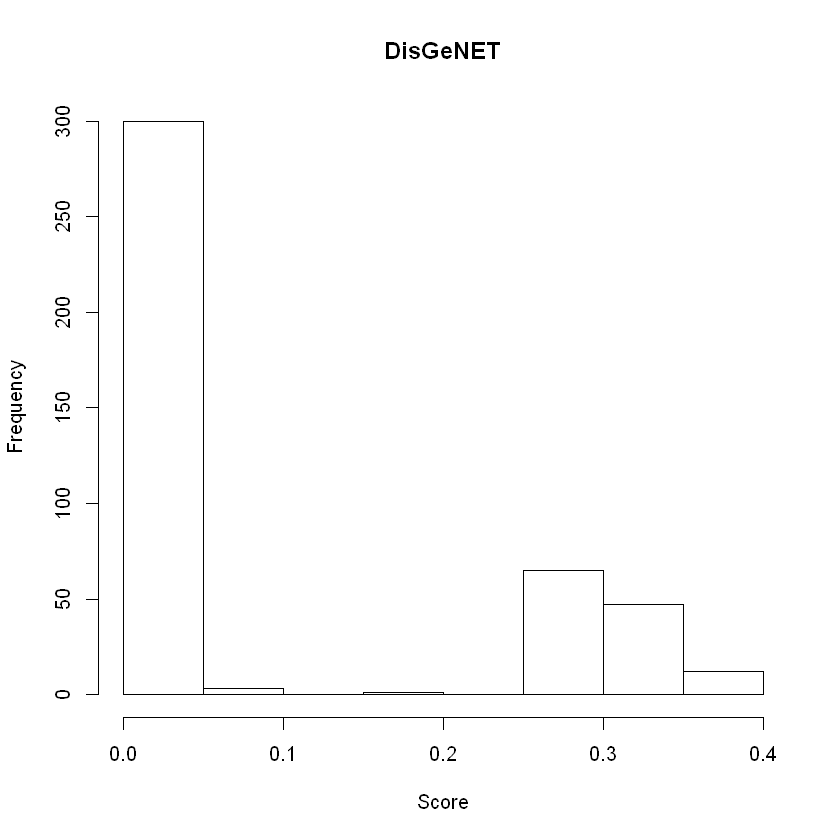

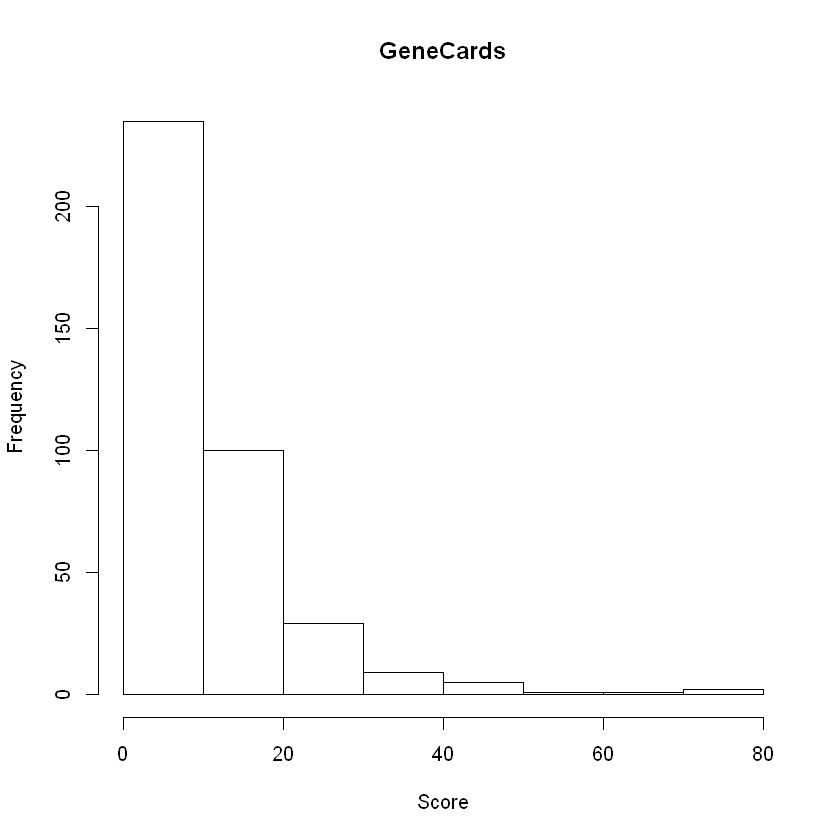

In [8]:
hist(merged_infl_genes$dis_score, main = "DisGeNET", xlab = "Score")
hist(merged_infl_genes$GC_score, main  = "GeneCards", xlab = "Score")

Both databases have their own approach of scoring the association of these genes with inflammation. Both are described in detail here: [DisGeNET](http://www.disgenet.org/dbinfo) and here [GeneCards](https://www.genecards.org/Guide). We opted a score of at least 10 for the GeneCards scoring system as our cutoff value. 

In [9]:
# filter out genes with a GeneCards score lower than 10, and filter out rows which contain NA value
merged_infl_genes <- merged_infl_genes[!merged_infl_genes$GC_score<10,]
merged_infl_genes <- merged_infl_genes %>% drop_na()
merged_infl_genes <- merged_infl_genes[order(merged_infl_genes$GC_score),]
head(merged_infl_genes)
dim(merged_infl_genes)

,entrezgene,hgnc_symbol,dis_score,GC_score
261,50616,IL22,0.01,10.08
290,1236,CCR7,0.01,10.12
338,847,CAT,0.01,10.21
25,6647,SOD1,0.33,10.35
357,5327,PLAT,0.01,10.36
335,361,AQP4,0.01,10.38


[1] 147   4

In [10]:
# save file
write.table(merged_infl_genes, file.path(getwd(), "Inflgenes", "merged_infl_genes.txt"), row.names = F, sep = "\t", quote = F)

Now we have our genes associated with inflammation, we can use these genes to acquire pathways.   